In [ ]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preparation**

In [ ]:
# You can access train.csv at : https://drive.google.com/file/d/1QgFrgoqxqizKeuOmkBHccl_nNRV8xR89/view?usp=drive_link
data = pd.read_csv("/content/drive/MyDrive/neuralearn/course_data/train.csv", sep= ",")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
data.shape

(1000, 12)

In [ ]:
# data = pd.read_csv("train_semi.csv", ",")
# data.head()
# data.shape

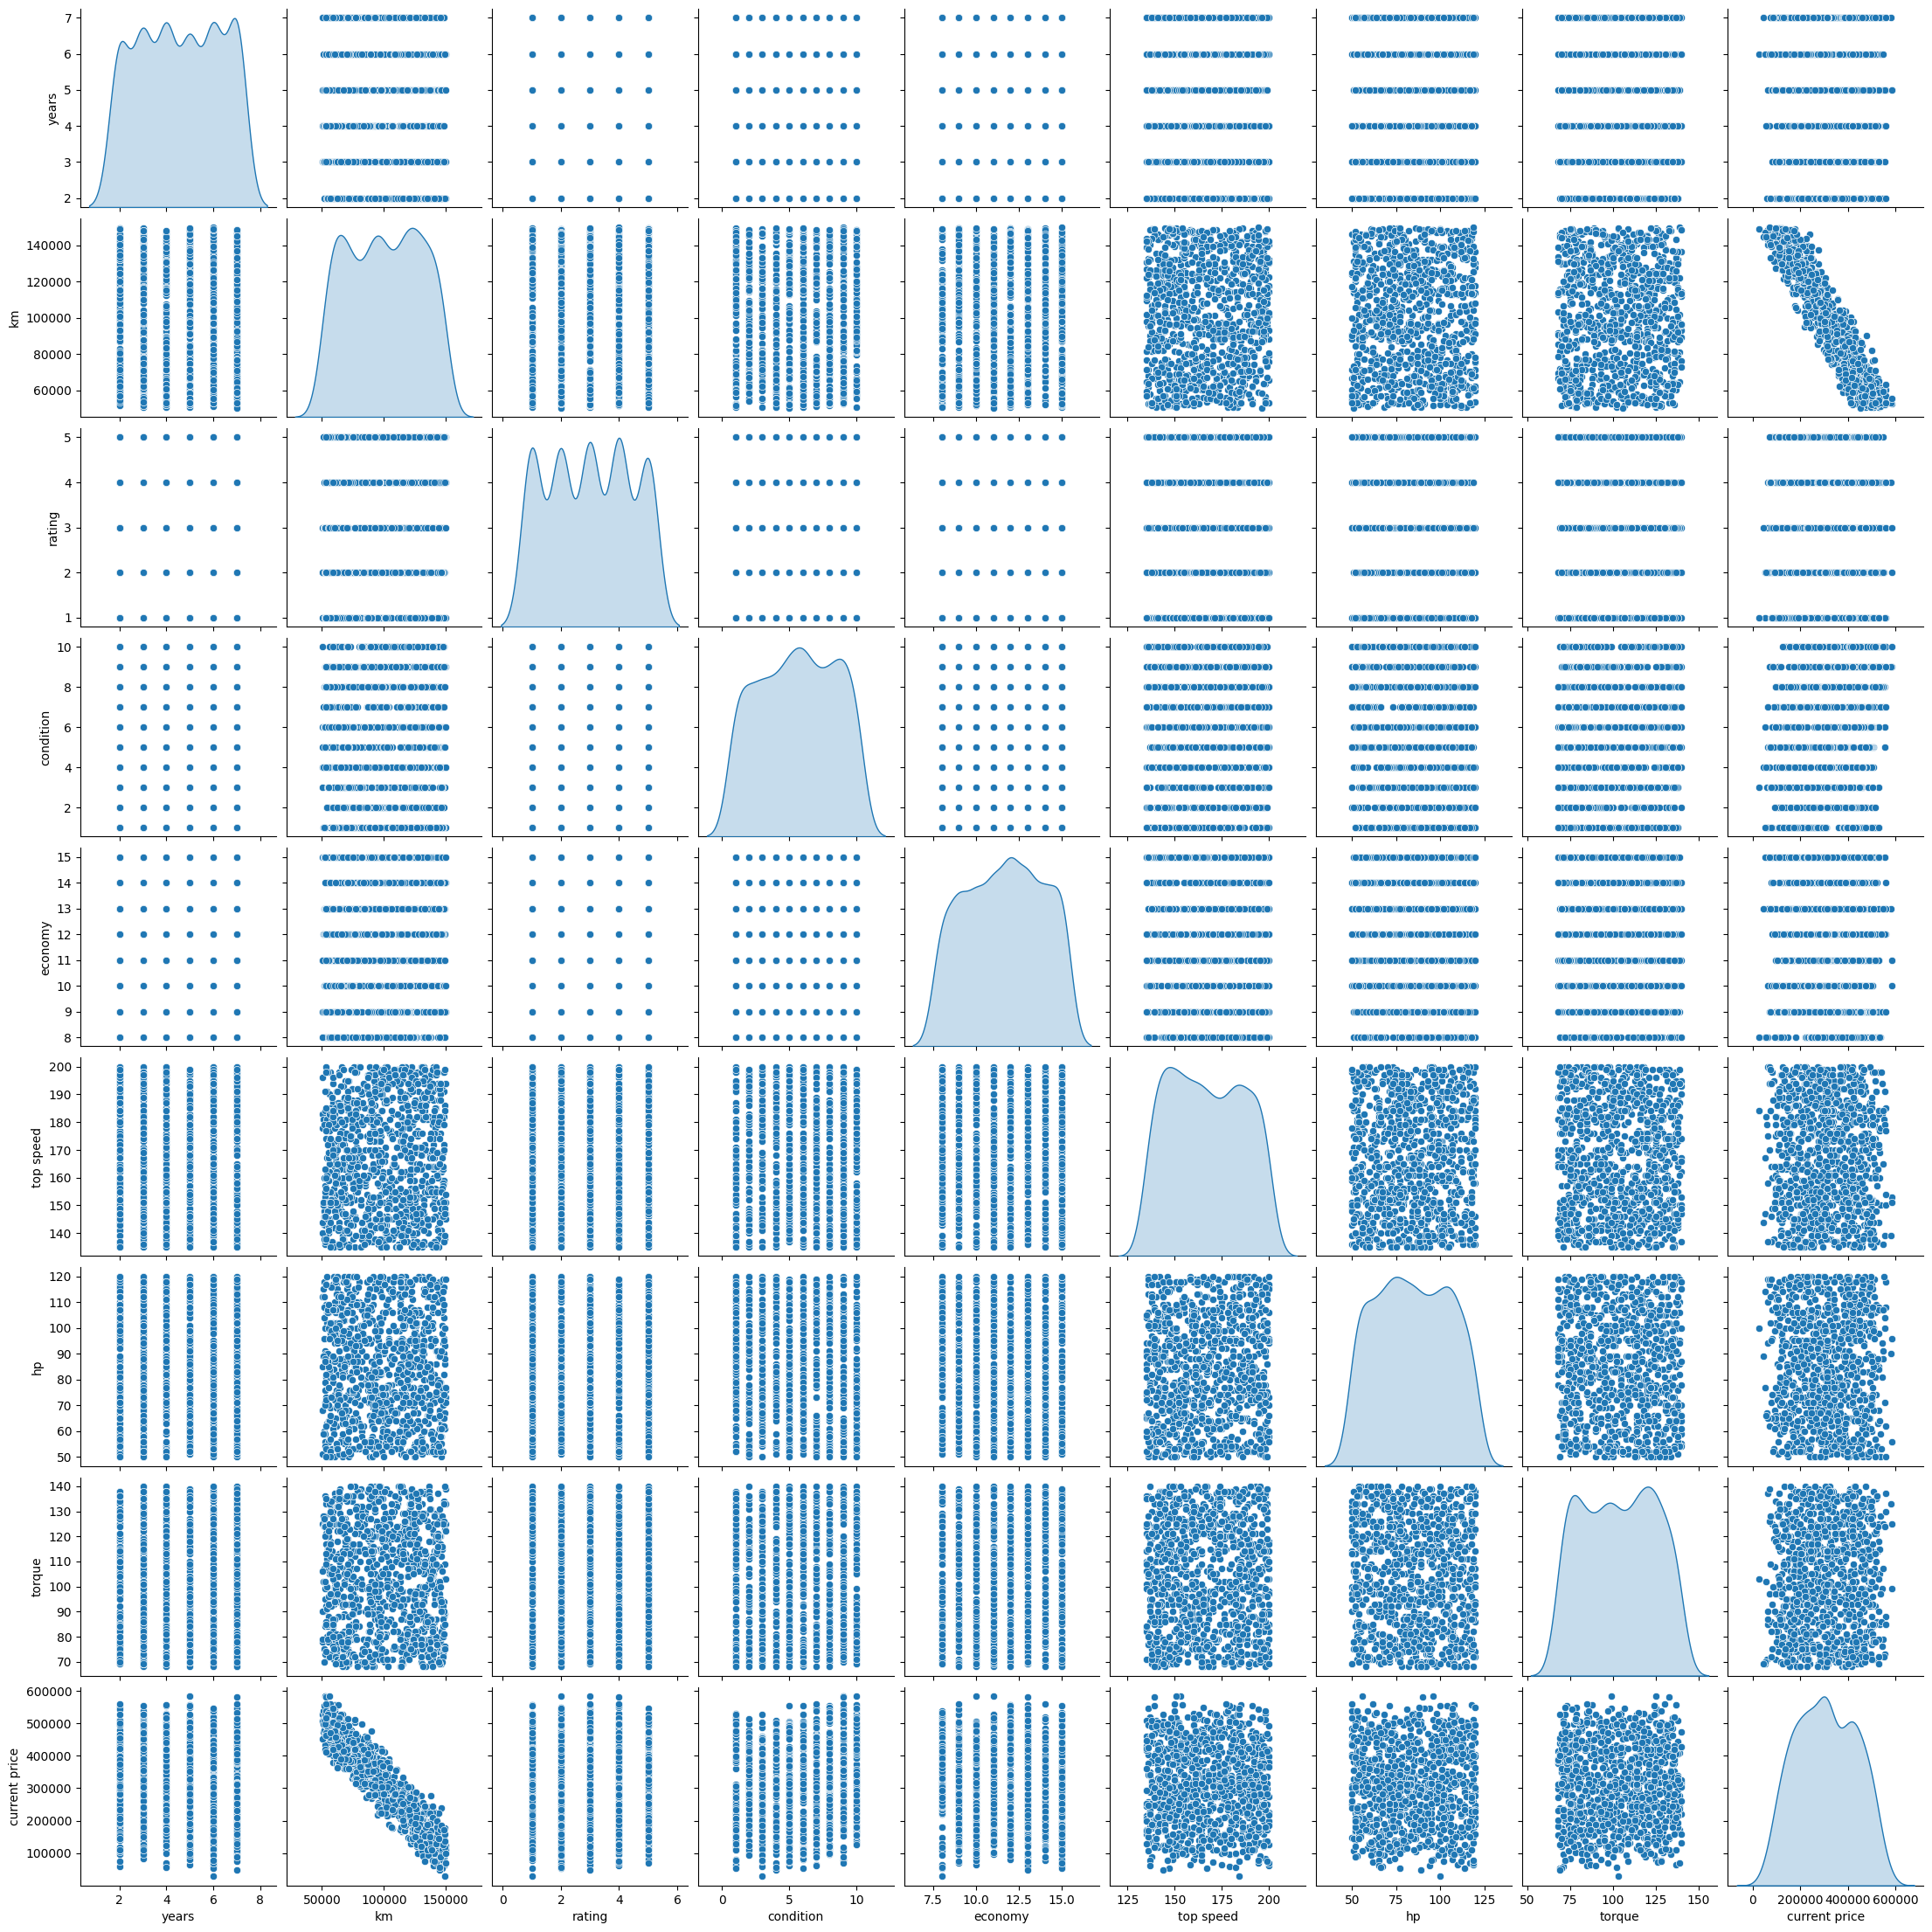

In [ ]:
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[9.460000e+02 5.084830e+05 7.886510e+05 3.000000e+00 1.016570e+05
  3.000000e+00 4.000000e+00 1.200000e+01 1.780000e+02 7.100000e+01
  1.240000e+02 2.427095e+05]
 [2.070000e+02 5.754550e+05 8.067480e+05 6.000000e+00 1.365840e+05
  1.000000e+00 8.000000e+00 1.100000e+01 1.820000e+02 1.080000e+02
  7.900000e+01 1.575070e+05]
 [8.600000e+02 5.897000e+05 7.546190e+05 2.000000e+00 7.303300e+04
  4.000000e+00 3.000000e+00 1.500000e+01 1.430000e+02 8.900000e+01
  1.100000e+02 3.809285e+05]
 [8.250000e+02 5.128090e+05 8.616150e+05 3.000000e+00 8.842900e+04
  5.000000e+00 7.000000e+00 1.400000e+01 1.740000e+02 5.400000e+01
  8.500000e+01 3.435950e+05]
 [4.140000e+02 5.067880e+05 8.554170e+05 2.000000e+00 1.233170e+05
  2.000000e+00 2.000000e+00 1.300000e+01 1.800000e+02 8.800000e+01
  1.250000e+02 1.881315e+05]], shape=(5, 12), dtype=float32)


In [ ]:
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[3.00000e+00 1.01657e+05 3.00000e+00 4.00000e+00 1.20000e+01 1.78000e+02
  7.10000e+01 1.24000e+02]
 [6.00000e+00 1.36584e+05 1.00000e+00 8.00000e+00 1.10000e+01 1.82000e+02
  1.08000e+02 7.90000e+01]
 [2.00000e+00 7.30330e+04 4.00000e+00 3.00000e+00 1.50000e+01 1.43000e+02
  8.90000e+01 1.10000e+02]
 [3.00000e+00 8.84290e+04 5.00000e+00 7.00000e+00 1.40000e+01 1.74000e+02
  5.40000e+01 8.50000e+01]
 [2.00000e+00 1.23317e+05 2.00000e+00 2.00000e+00 1.30000e+01 1.80000e+02
  8.80000e+01 1.25000e+02]], shape=(5, 8), dtype=float32)


In [ ]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[242709.5]
 [157507. ]
 [380928.5]
 [343595. ]
 [188131.5]], shape=(5, 1), dtype=float32)


In [ ]:
normalizer = Normalization(axis = -1, mean = 5, variance = 4)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [ ]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,10,6,7,8],
                            [32,1,56,3,5]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.7439795 , -0.26726124, -0.72800297,  0.3922322 ,  0.2672614 ],
       [-0.6695816 ,  1.3363062 , -0.6860028 ,  0.9805806 ,  1.0690452 ],
       [ 1.4135611 , -1.069045  ,  1.4140056 , -1.3728131 , -1.3363061 ]],
      dtype=float32)>

In [ ]:
print(X.shape, y.shape)

(1000, 8) (1000, 1)


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [ ]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).prefetch(tf.data.AUTOTUNE)

In [ ]:
print(X.shape)
print(y.shape)

(1000, 8)
(1000, 1)


In [ ]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).prefetch(tf.data.AUTOTUNE)

In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.8849987 ,  0.03477528, -0.0035761 , -0.53458196,  0.15091792,
         0.58814085, -0.66344535,  0.9714487 ],
       [ 0.8574107 ,  1.2221818 , -1.4339824 ,  0.87221265, -0.2962468 ,
         0.7961022 ,  1.1385354 , -1.1642553 ],
       [-1.4658017 , -0.9383493 ,  0.711627  , -0.8862806 ,  1.4924121 ,
        -1.2315214 ,  0.21319392,  0.30700746],
       [-0.8849987 , -0.4149345 ,  1.4268302 ,  0.520514  ,  1.0452473 ,
         0.38017944, -1.4913825 , -0.8794948 ],
       [-1.4658017 ,  0.7711461 , -0.7187792 , -1.2379793 ,  0.59808266,
         0.6921215 ,  0.16449174,  1.0189087 ]], dtype=float32)>

In [ ]:
print(X[:5])

tf.Tensor(
[[3.00000e+00 1.01657e+05 3.00000e+00 4.00000e+00 1.20000e+01 1.78000e+02
  7.10000e+01 1.24000e+02]
 [6.00000e+00 1.36584e+05 1.00000e+00 8.00000e+00 1.10000e+01 1.82000e+02
  1.08000e+02 7.90000e+01]
 [2.00000e+00 7.30330e+04 4.00000e+00 3.00000e+00 1.50000e+01 1.43000e+02
  8.90000e+01 1.10000e+02]
 [3.00000e+00 8.84290e+04 5.00000e+00 7.00000e+00 1.40000e+01 1.74000e+02
  5.40000e+01 8.50000e+01]
 [2.00000e+00 1.23317e+05 2.00000e+00 2.00000e+00 1.30000e+01 1.80000e+02
  8.80000e+01 1.25000e+02]], shape=(5, 8), dtype=float32)


In [ ]:
train_dataset = train_dataset.batch(8)
val_dataset = val_dataset.batch(8)

## **Model Creation and Training**

In [ ]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_13                │ (None, 8)              │            17 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

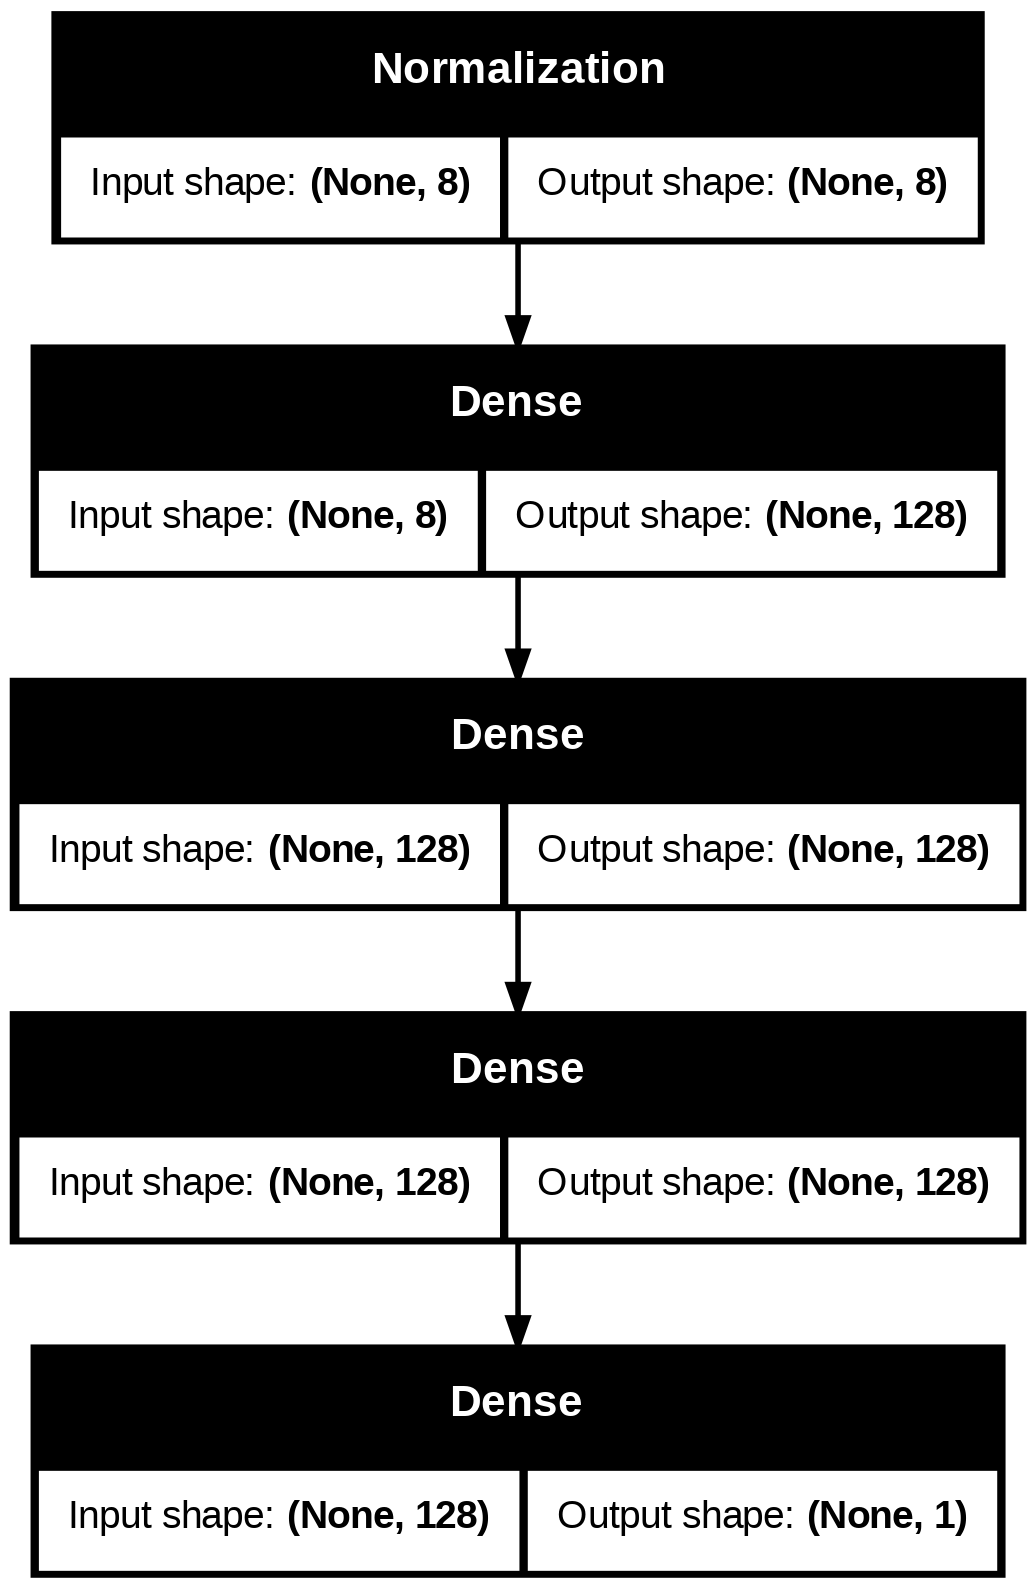

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 146098.8281 - root_mean_squared_error: 184255.9062 - val_loss: 62792.2695 - val_root_mean_squared_error: 75636.1250
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54399.7070 - root_mean_squared_error: 68208.6641 - val_loss: 41495.9219 - val_root_mean_squared_error: 51507.1289
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 48955.2188 - root_mean_squared_error: 62887.0547 - val_loss: 60121.8984 - val_root_mean_squared_error: 71817.4219
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 48204.0195 - root_mean_squared_error: 61708.0391 - val_loss: 71016.7500 - val_root_mean_squared_error: 84027.8672
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52372.2617 - root_mean_squared_error: 66053.9141 - val_loss: 36483.1836 - val_root_mean_squared_error: 44841.8477
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42780.8945 - root_mean_squared_error: 53100.9453 - val_loss: 4

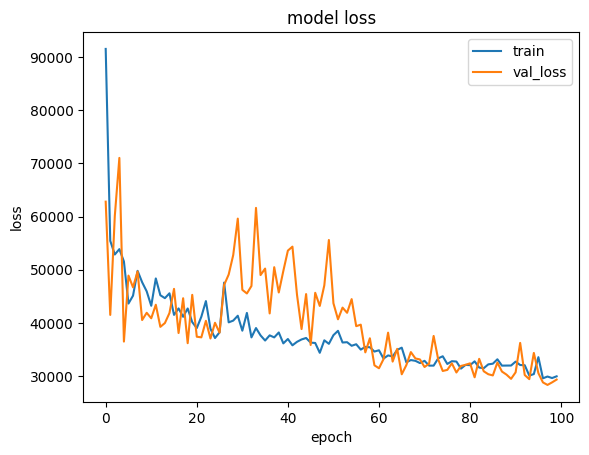

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

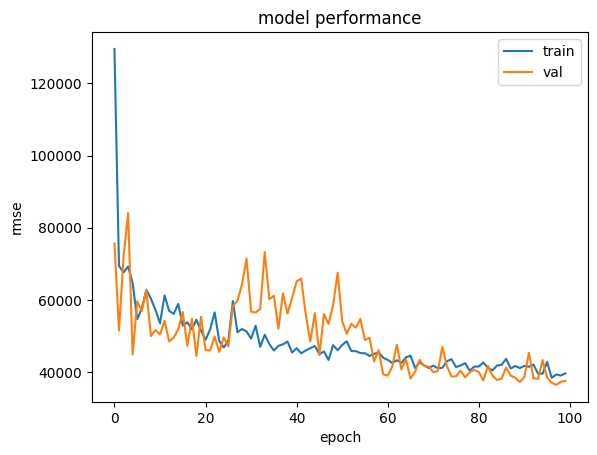

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## **Model Evaluation and Testing**

In [ ]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 37720.3125 - root_mean_squared_error: 47049.5352


[36453.80078125, 46125.0]

In [ ]:
X_test.shape

TensorShape([100, 8])

In [ ]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


array([[178490.44]], dtype=float32)

In [ ]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([97526.], dtype=float32)>

In [ ]:
y_true = list(y_test[:,0].numpy())

In [ ]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[np.float32(178490.44), np.float32(153073.25), np.float32(278322.6), np.float32(373573.47), np.float32(378594.2), np.float32(473903.0), np.float32(410310.3), np.float32(330464.6), np.float32(334918.8), np.float32(266835.9), np.float32(312188.03), np.float32(309114.34), np.float32(487882.56), np.float32(451973.66), np.float32(126698.52), np.float32(338690.28), np.float32(433933.8), np.float32(120077.336), np.float32(246229.9), np.float32(397113.44), np.float32(371242.4), np.float32(204909.81), np.float32(245494.83), np.float32(143502.39), np.float32(157911.64), np.float32(347690.06), np.float32(70472.62), np.float32(511669.3), np.float32(454234.06), np.float32(304321.0), np.float32(233598.6), np.float32(156791.4), np.float32(516848.7), np.float32(152640.34), np.float32(420990.7), np.float32(354390.22), np.float32(350823.53), np.float32(313452.75), np.float32(478940.44), np.float32(546805.44), np.float32(507980.94), np.float32(399416.75), np.float32(

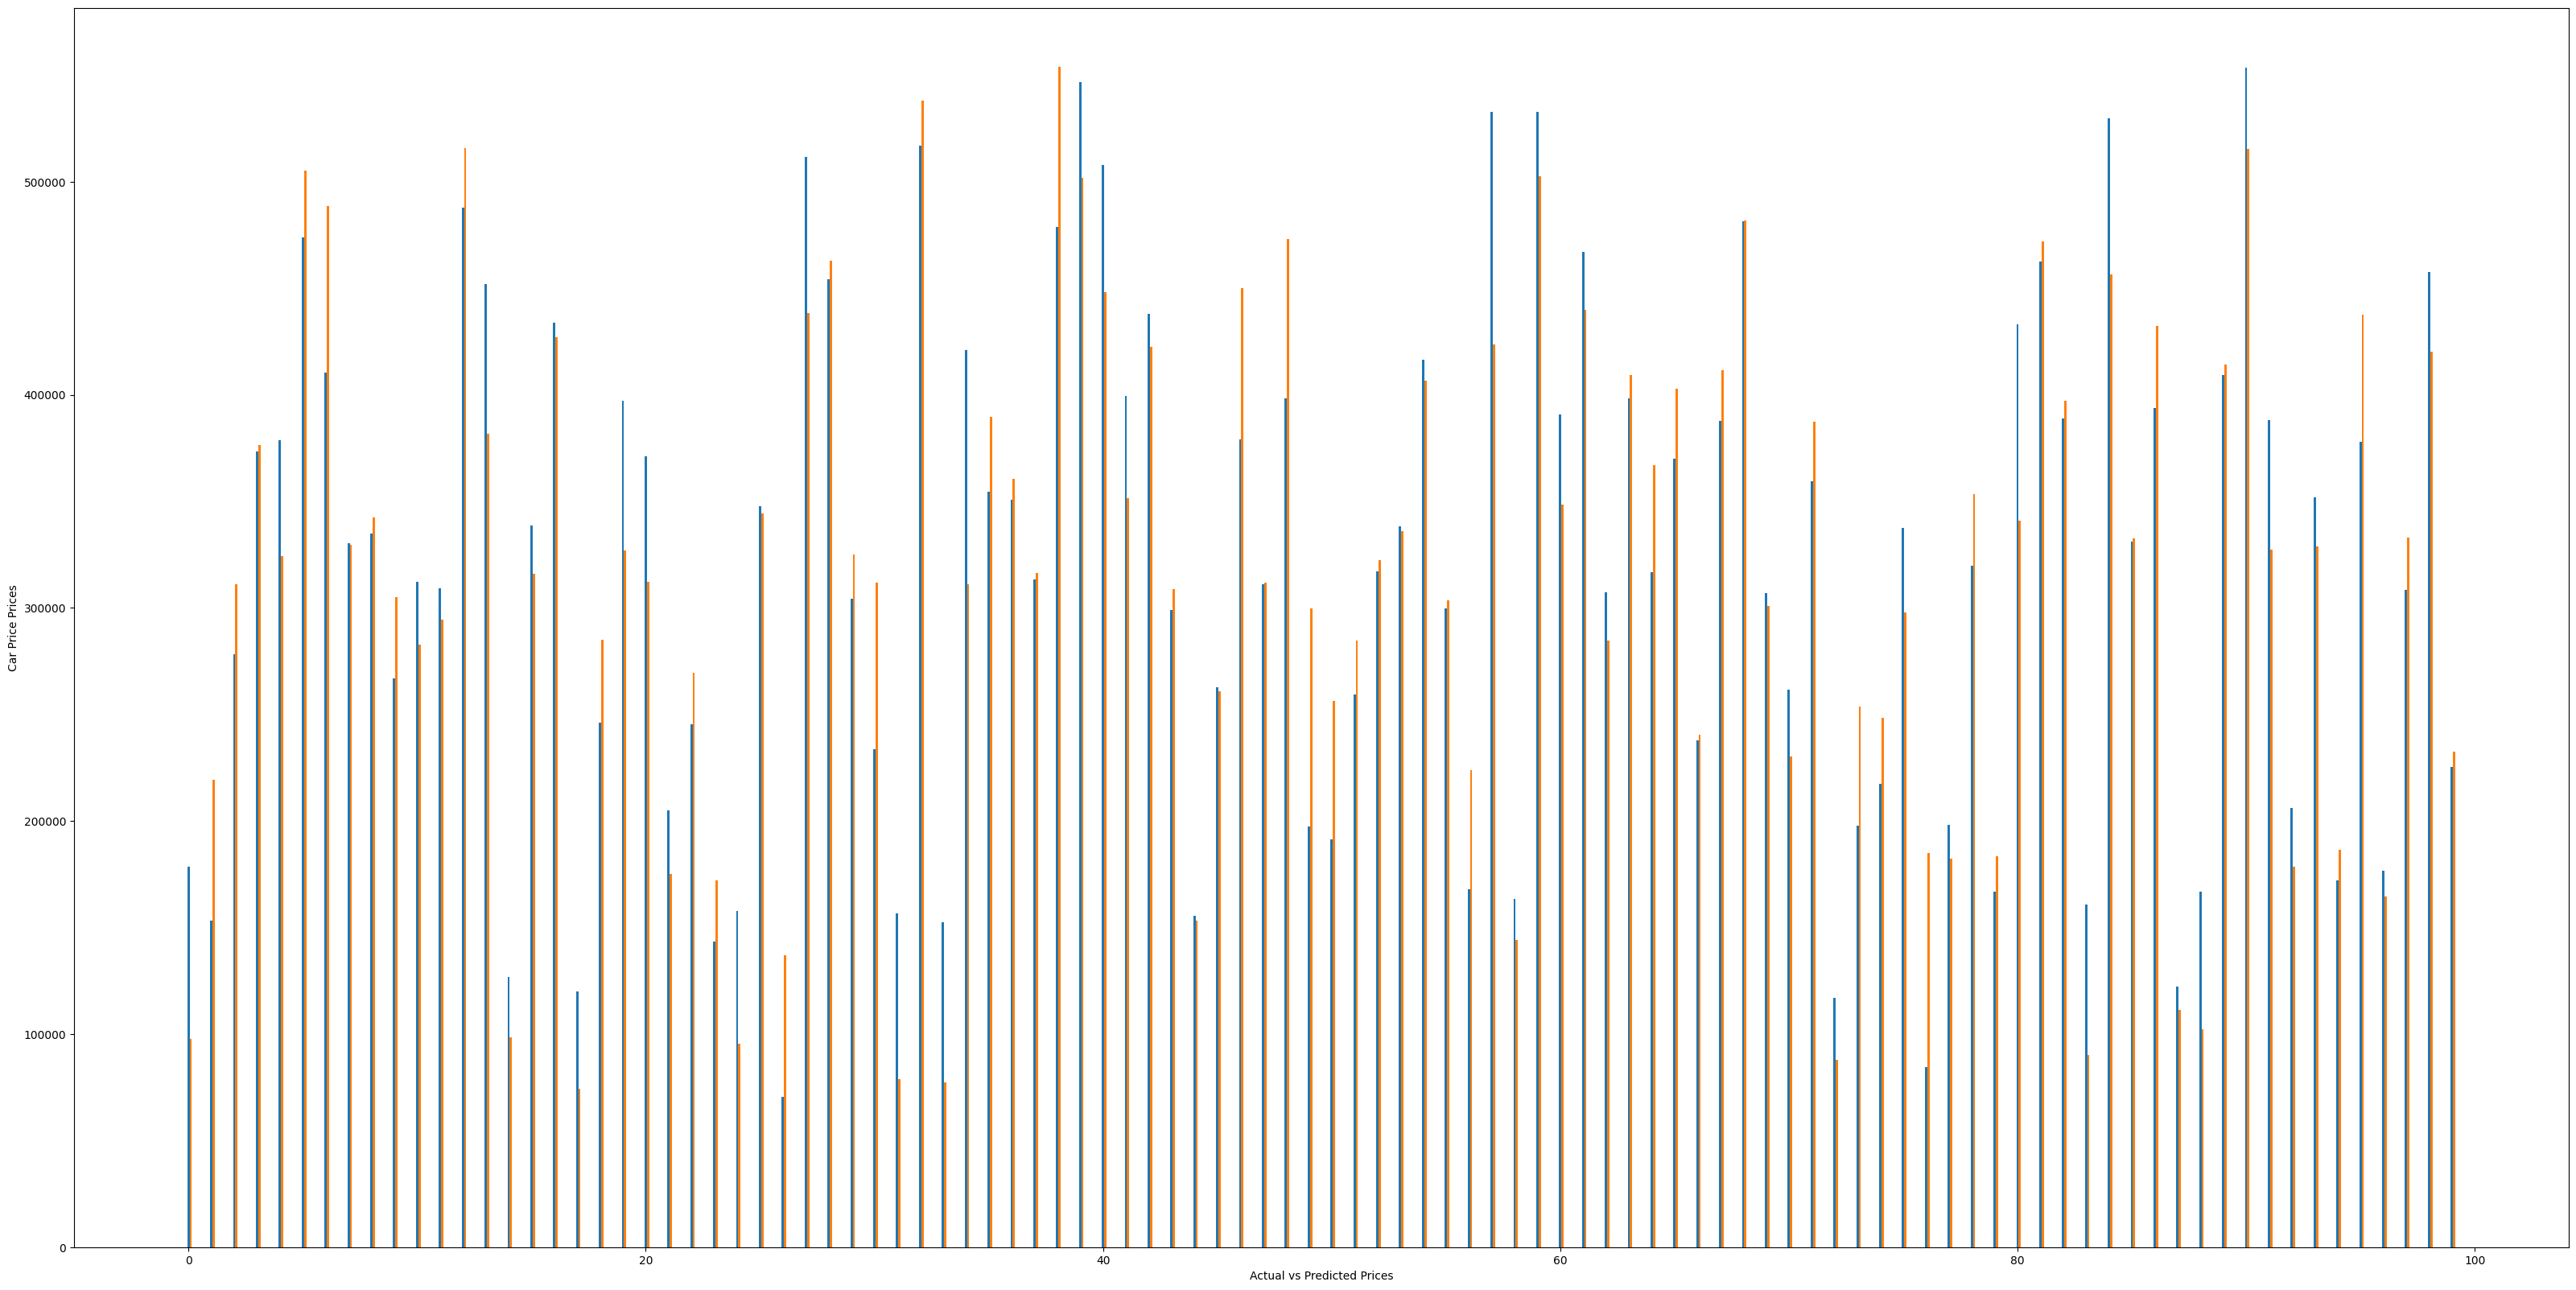

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()